In [1]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
import numpy as np

In [3]:
from tensorflow.keras.layers import Activation

In [4]:
x_data = np.array([2,4,5,7,8,10,25])
y_data = np.array([0,0,0,1,1,1,1])


In [5]:
#'binary_crossentropy'
# 활성화 함수 추가; import tensorflow.keras.activation
# model.add(Activation('sigmoid'))
#model.compile(loss='binary_crossentropy')

In [6]:
model=Sequential()
model.add(Dense(1,input_dim=1))
model.add(Activation('sigmoid'))
sgd=SGD(lr=1)
model.compile(loss='binary_crossentropy', optimizer=sgd)

## print
model.summary()

model.fit(x_data, y_data, epochs=200)
y_predict=model.predict(np.array([100]))
# print(y_predict)
model.predict_classes(np.array([100]))

W0711 11:19:23.863094 14920 deprecation.py:506] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0711 11:19:23.900640 14920 deprecation.py:323] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 [==============================] - 0s 20ms/sample - loss: 2.6318
Epoch 2/200
7/7 [==============================] - 0s 221us/sample - loss: 0.5117
Epoch 3/200
7/7 [==============================] - 0s 208us/sample - loss: 1.3476
Epoch 4/200
7/7 [==============================] - 0s 137us/sample - loss: 4.2849
Epoch 5/200
7/7 [==============================] - 0s 137us/sample - loss: 10.0930
Epoch 6/200
7/7 [==============================] - 0s 142us/sample - loss: 7.4400
Epoch 7/200
7/7 [===============

Epoch 93/200
7/7 [==============================] - 0s 139us/sample - loss: 0.1691
Epoch 94/200
7/7 [==============================] - 0s 136us/sample - loss: 0.3079
Epoch 95/200
7/7 [==============================] - 0s 71us/sample - loss: 0.1603
Epoch 96/200
7/7 [==============================] - 0s 142us/sample - loss: 0.2782
Epoch 97/200
7/7 [==============================] - 0s 213us/sample - loss: 0.1510
Epoch 98/200
7/7 [==============================] - 0s 142us/sample - loss: 0.2481
Epoch 99/200
7/7 [==============================] - 0s 71us/sample - loss: 0.1409
Epoch 100/200
7/7 [==============================] - 0s 142us/sample - loss: 0.2179
Epoch 101/200
7/7 [==============================] - 0s 142us/sample - loss: 0.1301
Epoch 102/200
7/7 [==============================] - 0s 142us/sample - loss: 0.1879
Epoch 103/200
7/7 [==============================] - 0s 140us/sample - loss: 0.1188
Epoch 104/200
7/7 [==============================] - 0s 142us/sample - loss: 0.1590
E

Epoch 191/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0567
Epoch 192/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0566
Epoch 193/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0565
Epoch 194/200
7/7 [==============================] - 0s 354us/sample - loss: 0.0564
Epoch 195/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0562
Epoch 196/200
7/7 [==============================] - 0s 212us/sample - loss: 0.0561
Epoch 197/200
7/7 [==============================] - 0s 214us/sample - loss: 0.0560
Epoch 198/200
7/7 [==============================] - 0s 141us/sample - loss: 0.0559
Epoch 199/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0558
Epoch 200/200
7/7 [==============================] - 0s 142us/sample - loss: 0.0557


array([[1]])

## Softmax 분류기 (다중 분류기) 실습

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

In [8]:
np.random.seed(777) # 학습 매번 랜덤하게 나타나는 것 방지
x_data = np.array([[1, 2, 1, 1],
                   [2, 1, 3, 2],
                   [3, 1, 3, 4],
                   [4, 1, 5, 5],
                   [1, 7, 5, 5],
                   [1, 2, 5, 6],
                   [1, 6, 6, 6],
                   [1, 7, 7, 7]],
                  dtype=np.float32)

y_data = np.array([[0, 0, 1],
                   [0, 0, 1],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 0],
                   [0, 1, 0],
                   [1, 0, 0],
                   [1, 0, 0]],
                  dtype=np.float32)

In [9]:
model = Sequential()
model.add(Dense(3, input_shape=(4,)))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='sgd', # = gradient descent
              metrics=['accuracy'])

model.fit(x_data, y_data, epochs=1000)

print(model.predict_classes(np.array([[1, 2, 1, 1]])))
print(model.predict_classes(np.array([[1, 2, 5, 6]])))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
8/8 [==============================] - 0s 5ms/sample - loss: 3.2486 - acc: 0.3750
Epoch 2/1000
8/8 [==============================] - 0s 123us/sample - loss: 3.0958 - acc: 0.3750
Epoch 3/1000
8/8 [==============================] - 0s 126us/sample - loss: 2.9678 - acc: 0.3750
Epoch 4/1000
8/8 [==============================] - 0s 124us/sample - loss: 2.8580 - acc: 0.3750
Epoch 5/1000
8/8 [==============================] - 0s 61us/sample - loss: 2.7619 - acc: 0.3750
Epoch 6/1000
8/8 [====================

Epoch 79/1000
8/8 [==============================] - 0s 123us/sample - loss: 1.2858 - acc: 0.1250
Epoch 80/1000
8/8 [==============================] - 0s 124us/sample - loss: 1.2785 - acc: 0.0000e+00
Epoch 81/1000
8/8 [==============================] - 0s 124us/sample - loss: 1.2715 - acc: 0.0000e+00
Epoch 82/1000
8/8 [==============================] - 0s 183us/sample - loss: 1.2645 - acc: 0.1250
Epoch 83/1000
8/8 [==============================] - 0s 185us/sample - loss: 1.2577 - acc: 0.1250
Epoch 84/1000
8/8 [==============================] - 0s 124us/sample - loss: 1.2510 - acc: 0.2500
Epoch 85/1000
8/8 [==============================] - 0s 62us/sample - loss: 1.2445 - acc: 0.2500
Epoch 86/1000
8/8 [==============================] - 0s 124us/sample - loss: 1.2380 - acc: 0.2500
Epoch 87/1000
8/8 [==============================] - 0s 124us/sample - loss: 1.2318 - acc: 0.2500
Epoch 88/1000
8/8 [==============================] - 0s 186us/sample - loss: 1.2256 - acc: 0.2500
Epoch 89/1000

Epoch 163/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.9780 - acc: 0.2500
Epoch 164/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.9762 - acc: 0.2500
Epoch 165/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.9745 - acc: 0.2500
Epoch 166/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.9727 - acc: 0.3750
Epoch 167/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.9710 - acc: 0.3750
Epoch 168/1000
8/8 [==============================] - 0s 125us/sample - loss: 0.9693 - acc: 0.3750
Epoch 169/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.9677 - acc: 0.3750
Epoch 170/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.9660 - acc: 0.5000
Epoch 171/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.9643 - acc: 0.5000
Epoch 172/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.9627 - acc: 0.5000
Epoch 173/10

Epoch 246/1000
8/8 [==============================] - 0s 123us/sample - loss: 0.8713 - acc: 0.5000
Epoch 247/1000
8/8 [==============================] - 0s 61us/sample - loss: 0.8703 - acc: 0.5000
Epoch 248/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.8694 - acc: 0.5000
Epoch 249/1000
8/8 [==============================] - 0s 123us/sample - loss: 0.8684 - acc: 0.5000
Epoch 250/1000
8/8 [==============================] - 0s 191us/sample - loss: 0.8674 - acc: 0.5000
Epoch 251/1000
8/8 [==============================] - 0s 181us/sample - loss: 0.8665 - acc: 0.5000
Epoch 252/1000
8/8 [==============================] - 0s 126us/sample - loss: 0.8655 - acc: 0.5000
Epoch 253/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.8646 - acc: 0.5000
Epoch 254/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.8636 - acc: 0.5000
Epoch 255/1000
8/8 [==============================] - 0s 129us/sample - loss: 0.8627 - acc: 0.5000
Epoch 256/10

Epoch 329/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.8021 - acc: 0.5000
Epoch 330/1000
8/8 [==============================] - 0s 120us/sample - loss: 0.8014 - acc: 0.5000
Epoch 331/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.8007 - acc: 0.5000
Epoch 332/1000
8/8 [==============================] - 0s 120us/sample - loss: 0.8000 - acc: 0.5000
Epoch 333/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7993 - acc: 0.5000
Epoch 334/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.7986 - acc: 0.5000
Epoch 335/1000
8/8 [==============================] - 0s 64us/sample - loss: 0.7979 - acc: 0.5000
Epoch 336/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7972 - acc: 0.5000
Epoch 337/1000
8/8 [==============================] - 0s 64us/sample - loss: 0.7965 - acc: 0.5000
Epoch 338/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.7958 - acc: 0.5000
Epoch 339/1000

Epoch 412/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.7496 - acc: 0.6250
Epoch 413/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.7491 - acc: 0.6250
Epoch 414/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7485 - acc: 0.6250
Epoch 415/1000
8/8 [==============================] - 0s 121us/sample - loss: 0.7480 - acc: 0.6250
Epoch 416/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7474 - acc: 0.6250
Epoch 417/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7468 - acc: 0.6250
Epoch 418/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7463 - acc: 0.6250
Epoch 419/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7457 - acc: 0.6250
Epoch 420/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7452 - acc: 0.6250
Epoch 421/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7447 - acc: 0.6250
Epoch 422/10

Epoch 495/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7080 - acc: 0.6250
Epoch 496/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7075 - acc: 0.6250
Epoch 497/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7071 - acc: 0.6250
Epoch 498/1000
8/8 [==============================] - 0s 248us/sample - loss: 0.7066 - acc: 0.6250
Epoch 499/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7062 - acc: 0.6250
Epoch 500/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7057 - acc: 0.6250
Epoch 501/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7053 - acc: 0.6250
Epoch 502/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.7049 - acc: 0.6250
Epoch 503/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7044 - acc: 0.6250
Epoch 504/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.7040 - acc: 0.6250
Epoch 505/

Epoch 578/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6742 - acc: 0.6250
Epoch 579/1000
8/8 [==============================] - 0s 120us/sample - loss: 0.6739 - acc: 0.6250
Epoch 580/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6735 - acc: 0.6250
Epoch 581/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6731 - acc: 0.6250
Epoch 582/1000
8/8 [==============================] - 0s 61us/sample - loss: 0.6728 - acc: 0.6250
Epoch 583/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6724 - acc: 0.6250
Epoch 584/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.6720 - acc: 0.6250
Epoch 585/1000
8/8 [==============================] - 0s 121us/sample - loss: 0.6717 - acc: 0.6250
Epoch 586/1000
8/8 [==============================] - 0s 121us/sample - loss: 0.6713 - acc: 0.6250
Epoch 587/1000
8/8 [==============================] - 0s 120us/sample - loss: 0.6710 - acc: 0.6250
Epoch 588/100

Epoch 661/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6464 - acc: 0.6250
Epoch 662/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6461 - acc: 0.6250
Epoch 663/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6458 - acc: 0.6250
Epoch 664/1000
8/8 [==============================] - 0s 123us/sample - loss: 0.6455 - acc: 0.6250
Epoch 665/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6452 - acc: 0.6250
Epoch 666/1000
8/8 [==============================] - 0s 60us/sample - loss: 0.6449 - acc: 0.6250
Epoch 667/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6446 - acc: 0.6250
Epoch 668/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6443 - acc: 0.6250
Epoch 669/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6440 - acc: 0.6250
Epoch 670/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6437 - acc: 0.6250
Epoch 671/1000
8

Epoch 745/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6229 - acc: 0.6250
Epoch 746/1000
8/8 [==============================] - 0s 66us/sample - loss: 0.6226 - acc: 0.6250
Epoch 747/1000
8/8 [==============================] - 0s 121us/sample - loss: 0.6223 - acc: 0.6250
Epoch 748/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6221 - acc: 0.6250
Epoch 749/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6218 - acc: 0.6250
Epoch 750/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6216 - acc: 0.6250
Epoch 751/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6213 - acc: 0.6250
Epoch 752/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6211 - acc: 0.6250
Epoch 753/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6208 - acc: 0.6250
Epoch 754/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6206 - acc: 0.6250
Epoch 755/100

Epoch 829/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6029 - acc: 0.7500
Epoch 830/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6026 - acc: 0.7500
Epoch 831/1000
8/8 [==============================] - 0s 123us/sample - loss: 0.6024 - acc: 0.7500
Epoch 832/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6022 - acc: 0.7500
Epoch 833/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6020 - acc: 0.7500
Epoch 834/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6018 - acc: 0.7500
Epoch 835/1000
8/8 [==============================] - 0s 127us/sample - loss: 0.6015 - acc: 0.7500
Epoch 836/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.6013 - acc: 0.7500
Epoch 837/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.6011 - acc: 0.7500
Epoch 838/1000
8/8 [==============================] - 0s 122us/sample - loss: 0.6009 - acc: 0.7500
Epoch 839/100

8/8 [==============================] - 0s 123us/sample - loss: 0.5858 - acc: 0.7500
Epoch 913/1000
8/8 [==============================] - 0s 125us/sample - loss: 0.5856 - acc: 0.7500
Epoch 914/1000
8/8 [==============================] - 0s 122us/sample - loss: 0.5854 - acc: 0.7500
Epoch 915/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.5852 - acc: 0.7500
Epoch 916/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.5851 - acc: 0.7500
Epoch 917/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.5849 - acc: 0.7500
Epoch 918/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.5847 - acc: 0.7500
Epoch 919/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.5845 - acc: 0.7500
Epoch 920/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.5843 - acc: 0.7500
Epoch 921/1000
8/8 [==============================] - 0s 186us/sample - loss: 0.5841 - acc: 0.7500
Epoch 922/1000
8/8 [=======

Epoch 996/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.5707 - acc: 0.7500
Epoch 997/1000
8/8 [==============================] - 0s 124us/sample - loss: 0.5706 - acc: 0.7500
Epoch 998/1000
8/8 [==============================] - 0s 125us/sample - loss: 0.5704 - acc: 0.7500
Epoch 999/1000
8/8 [==============================] - 0s 62us/sample - loss: 0.5702 - acc: 0.7500
Epoch 1000/1000
8/8 [==============================] - 0s 126us/sample - loss: 0.5701 - acc: 0.7500
[2]
[1]


In [10]:
print(model.predict(np.array([[1,2,5,6]])))

[[0.22057815 0.7498512  0.0295707 ]]


In [11]:
pred=model.predict(np.array([[1,2,5,6]]))

In [12]:
print(np.argmax(pred,axis=1))

[1]


In [13]:
print(np.argmax(pred,axis=-1))

[1]


In [14]:
print(model.predict_classes(np.array([[1,2,5,6]])))

[1]


In [15]:
for i in range(10):
    print(np.random.randint(10))

8
3
5
8
0
7
6
3
8
7


# Boston Housing Dataset으로 실습 (github에 6번 문제)

In [16]:
# 일부만 할당된 GPU 메모리를 실행하는 동안 필요한만큼 늘릴 수 있도록 설정함
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [17]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np

np.random.seed(777)

In [18]:
# 모델 학습 시 불필요한 출력을 끄도록 함 (warning)
import tensorflow as tf

tf.logging.set_verbosity(tf.logging.ERROR)

## 1) 데이터 준비

In [19]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [20]:
print(train_data.shape)
print(test_data.shape)
# feature가 13개, row 개수가 data 개수

(404, 13)
(102, 13)


In [21]:
print(train_targets) # 단위: 천 달러

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

## 2) 데이터 전처리

In [22]:
mean=train_data.mean(axis=0) # axis=0 -> 13개의 행벡터
train_data-=mean

std=train_data.std(axis=0)
train_data /= std

# 테스트 셋도 훈련 셋에서 계산된 mean과 std를 동일하게 사용함
# 만약 각각 정규화를 수행해버리면, 학습 결과 적용이 불가능해짐
test_data -= mean
test_data /= std

## 3. 네트워크 정의

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# dense layer: 

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1)) # 회귀 모델 (출력층에 활성화 함수 없음)
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

## 4. (K-겹 교차 검증을 사용한) 모델 학습

In [24]:
# 평균 성능을 검증하기 위해 짠 모델
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    model.fit(partial_train_data, 
              partial_train_targets,
              epochs = num_epochs,
              batch_size = 1,
              verbose = 0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

print(all_scores)
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
[2.2050204, 2.9392488, 2.8296273, 2.50812]
finished!!


In [25]:
print(all_scores)
mean = np.mean(all_scores)
stddev = np.std(all_scores)

print(u'%.2f \u00B1(%.2f)'%(mean, stddev))

[2.2050204, 2.9392488, 2.8296273, 2.50812]
2.62 ±(0.29)


In [26]:
'''
4-fold의 평균 validation MAE 그래프 그리기
'''

print(model.metrics_names)

['loss', 'mean_absolute_error']


In [27]:
# 오버피팅 되는 지점을 알기 위해 짠 모델
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('>> fold ', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i*num_val_samples],
                                         train_data[(i+1) * num_val_samples:]],
                                        axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples],
                                            train_targets[(i+1) * num_val_samples:]],
                                           axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, 
                     partial_train_targets,
                     epochs = num_epochs,
                     batch_size = 1,
                     verbose = 0,
                     validation_data = (val_data, val_targets)) # 이게 추가된 부분
    
    mae_history = hist.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
print('finished!!')

>> fold  0
>> fold  1
>> fold  2
>> fold  3
finished!!


In [28]:
print(all_mae_histories)

[[3.9903953, 3.277869, 2.7218728, 2.7267334, 2.4595144, 2.3035123, 2.2825592, 2.1882684, 2.0438716, 2.097806, 2.1277359, 2.0438862, 1.9546684, 2.1828496, 2.283638, 1.9622793, 1.9629544, 1.8620774, 2.075318, 2.154248, 2.088892, 1.9952776, 1.9720099, 2.0404484, 1.8754599, 1.9889854, 2.002219, 1.9132657, 1.8661436, 1.8197219, 2.3763683, 1.8287174, 1.9596853, 2.0071385, 1.9140619, 1.8832871, 2.0975668, 1.9986378, 1.8332725, 2.0950298, 2.1024668, 1.9512243, 2.5709355, 1.8604369, 1.8926499, 1.8559818, 2.0063682, 1.9539129, 1.7655452, 1.9530346, 1.8461778, 2.0300128, 2.150197, 1.7334148, 1.8640045, 1.9466082, 1.861554, 1.8384717, 1.8376896, 1.8723214, 1.9180746, 1.9700344, 1.9238119, 2.00983, 1.8271575, 1.8491998, 1.9983864, 1.7835774, 2.1057782, 2.179852, 1.9778317, 1.8363788, 1.7722749, 2.4237785, 1.9426941, 2.0859015, 1.9197084, 2.6374636, 2.4382539, 2.0621133, 1.938624, 1.9882888, 2.0891929, 1.8710492, 2.0969803, 2.2420785, 2.0410306, 2.139465, 2.0092933, 2.0550256, 2.328419, 2.0297768, 2

In [29]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

print(average_mae_history)

[4.8087883, 3.5820727, 3.1243007, 2.9692438, 2.8032136, 2.7392151, 2.7906187, 2.6347141, 2.5269551, 2.5343223, 2.5622296, 2.5090685, 2.532741, 2.5939279, 2.630631, 2.4550426, 2.535872, 2.4246716, 2.5110085, 2.5109065, 2.4626822, 2.4204586, 2.467154, 2.545518, 2.3622952, 2.4145584, 2.4588306, 2.355758, 2.270659, 2.2994938, 2.547406, 2.2446425, 2.3333395, 2.508732, 2.410834, 2.3241115, 2.408078, 2.3141074, 2.479994, 2.3447895, 2.3370137, 2.357742, 2.4760773, 2.358442, 2.308027, 2.3307645, 2.3661625, 2.2825336, 2.2930827, 2.2692063, 2.3518472, 2.4486456, 2.434409, 2.2799644, 2.3590286, 2.281621, 2.313902, 2.2417364, 2.3206356, 2.2458668, 2.229147, 2.2865696, 2.2466123, 2.3876586, 2.2337427, 2.2248774, 2.250269, 2.182637, 2.325924, 2.4702806, 2.3744452, 2.3221412, 2.2443645, 2.4818013, 2.2803168, 2.4223185, 2.303147, 2.520201, 2.4908113, 2.2899761, 2.5251095, 2.391181, 2.279678, 2.3425565, 2.3713698, 2.4720254, 2.4292905, 2.3778653, 2.3405836, 2.3441422, 2.3771317, 2.23437, 2.233468, 2.257

In [30]:
average_mae_history = []
for epoch in range(num_epochs):
    average_mae_per_epoch = []
    
    for mae_history in all_mae_histories: # 4개 fold 반복
        average_mae_per_epoch.append(mae_history[epoch])
    
    mean = np.mean(average_mae_per_epoch)
    average_mae_history.append(mean)

print(average_mae_history)

[4.8087883, 3.5820727, 3.1243007, 2.9692438, 2.8032136, 2.7392151, 2.7906187, 2.6347141, 2.5269551, 2.5343223, 2.5622296, 2.5090685, 2.532741, 2.5939279, 2.630631, 2.4550426, 2.535872, 2.4246716, 2.5110085, 2.5109065, 2.4626822, 2.4204586, 2.467154, 2.545518, 2.3622952, 2.4145584, 2.4588306, 2.355758, 2.270659, 2.2994938, 2.547406, 2.2446425, 2.3333395, 2.508732, 2.410834, 2.3241115, 2.408078, 2.3141074, 2.479994, 2.3447895, 2.3370137, 2.357742, 2.4760773, 2.358442, 2.308027, 2.3307645, 2.3661625, 2.2825336, 2.2930827, 2.2692063, 2.3518472, 2.4486456, 2.434409, 2.2799644, 2.3590286, 2.281621, 2.313902, 2.2417364, 2.3206356, 2.2458668, 2.229147, 2.2865696, 2.2466123, 2.3876586, 2.2337427, 2.2248774, 2.250269, 2.182637, 2.325924, 2.4702806, 2.3744452, 2.3221412, 2.2443645, 2.4818013, 2.2803168, 2.4223185, 2.303147, 2.520201, 2.4908113, 2.2899761, 2.5251095, 2.391181, 2.279678, 2.3425565, 2.3713698, 2.4720254, 2.4292905, 2.3778653, 2.3405836, 2.3441422, 2.3771317, 2.23437, 2.233468, 2.257

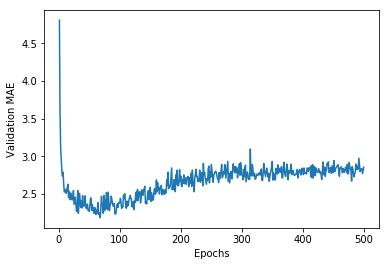

In [31]:
import matplotlib.pyplot as plt

# matplotlib이 Jupyter notebook 셀 안에서 생성되도록 함
# https://versusall.tistory.com/entry/Jupyter-Notebook-4-%EC%99%B8%EB%B6%80%EC%B0%BD%EC%97%90%EC%84%9C-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B7%B8%EB%A6%AC%EA%B8%B0-matplotlib-inline-qt-tk%C2%B6
%matplotlib inline

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

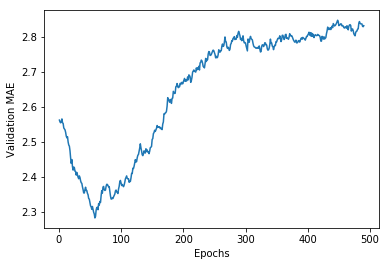

In [32]:

'''
시계열 신호에 지수 이동 평균(exponential moving averge) 필터링
'''
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            prev = smoothed_points[-1]
            smoothed_points.append(prev*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## 5. (과대적합 되기 전까지) 모델 학습

In [33]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = build_model()
model.fit(train_data, 
          train_targets,
          epochs = 80,
          batch_size = 16,
          verbose = 1)

Epoch 1/80
404/404 [==============================] - 0s 308us/sample - loss: 529.3099 - mean_absolute_error: 21.1201
Epoch 2/80
404/404 [==============================] - 0s 50us/sample - loss: 391.4531 - mean_absolute_error: 17.5146
Epoch 3/80
404/404 [==============================] - 0s 54us/sample - loss: 227.8739 - mean_absolute_error: 12.5137
Epoch 4/80
404/404 [==============================] - 0s 49us/sample - loss: 102.3643 - mean_absolute_error: 7.9563
Epoch 5/80
404/404 [==============================] - 0s 53us/sample - loss: 53.7321 - mean_absolute_error: 5.5671
Epoch 6/80
404/404 [==============================] - 0s 52us/sample - loss: 34.0041 - mean_absolute_error: 4.2740
Epoch 7/80
404/404 [==============================] - 0s 50us/sample - loss: 25.1794 - mean_absolute_error: 3.5381
Epoch 8/80
404/404 [==============================] - 0s 52us/sample - loss: 21.1389 - mean_absolute_error: 3.1769
Epoch 9/80
404/404 [==============================] - 0s 54us/sample - l

404/404 [==============================] - 0s 49us/sample - loss: 6.1518 - mean_absolute_error: 1.7353
Epoch 73/80
404/404 [==============================] - 0s 50us/sample - loss: 6.0509 - mean_absolute_error: 1.6671
Epoch 74/80
404/404 [==============================] - 0s 48us/sample - loss: 6.1860 - mean_absolute_error: 1.7202
Epoch 75/80
404/404 [==============================] - 0s 52us/sample - loss: 5.8348 - mean_absolute_error: 1.6604
Epoch 76/80
404/404 [==============================] - 0s 52us/sample - loss: 6.0713 - mean_absolute_error: 1.7052
Epoch 77/80
404/404 [==============================] - 0s 53us/sample - loss: 6.0899 - mean_absolute_error: 1.6832
Epoch 78/80
404/404 [==============================] - 0s 52us/sample - loss: 5.9568 - mean_absolute_error: 1.6735
Epoch 79/80
404/404 [==============================] - 0s 50us/sample - loss: 5.7165 - mean_absolute_error: 1.6638
Epoch 80/80
404/404 [==============================] - 0s 52us/sample - loss: 5.8714 - mean_

## 6. 테스트셋으로 성능 평가하기

In [34]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print('test MSE score: %.3f', test_mse_score)
print('test MAE score: %.3f', test_mae_score)

102/102 [==============================] - 0s 472us/sample - loss: 18.9710 - mean_absolute_error: 2.6402
test MSE score: %.3f 18.97099723067938
test MAE score: %.3f 2.6402295


# 실습: 7_binary classification(IMDB)

In [36]:
import tensorflow as tf
# gpu 메모리 설정
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [37]:
# 동일한 결과를 재현하기 위해서 random seed 고정
import numpy as np
np.random.seed(777)

In [38]:
# 모델 학습시 불필요한 출력을 끄도록 함 (warning)
tf.logging.set_verbosity(tf.logging.ERROR)

## 1. 데이터 준비

In [78]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10**4)

In [79]:
sample_idx = 4
print(train_data[sample_idx])

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 14, 20, 56, 33, 2401, 18, 457, 88, 13, 2626, 1400, 45, 3171, 13, 70, 79, 49, 706, 919, 13, 16, 355, 340, 355, 1696, 96, 143, 4, 22, 32, 289, 7, 61, 369, 71, 2359, 5, 13, 16, 131, 2073, 249, 114, 249, 229, 249, 20, 13, 28, 126, 110, 13, 473, 8, 569, 61, 419, 56, 429, 6, 1513, 18, 35, 534, 95, 474, 570, 5, 25, 124, 138, 88, 12, 421, 1543, 52, 725, 6397, 61, 419, 11, 13, 1571, 15, 1543, 20, 11, 4, 2, 5, 296, 12, 3524, 5, 15, 421, 128, 74, 233, 334, 207, 126, 224, 12, 562, 298, 2167, 1272, 7, 2601, 5, 516, 988, 43, 8, 79, 120, 15, 595, 13, 784, 25, 3171, 18, 165, 170, 143, 19, 14, 5, 7224, 6, 226, 251, 7, 61, 113]


In [80]:
print(train_labels[sample_idx])

0


In [81]:
word_index = imdb.get_word_index() # 특정 단어를 하나의 정수 인덱스로 매핑해놓은 딕셔너리
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()]) #{단어:정수} => {정수:단어}로 저장

#벡터화된 문장을 텍스트로 디코딩
# 0,1,2번째 단어는 '패딩', '문서 시작', '사전에 없음'을 뜻하는 기호임
decoded_review= ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[sample_idx]])
print(decoded_review)

? worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the ? and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life


## 2. 데이터 전처리

In [82]:
def vectorize_sequences(sequences, dimension=10**4):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence]= 1 # 문장에 존재하는 단어들만 one-hot encoding
    return results

# 문장들을 일정한 크기의 벡터로 전환
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [83]:
# 리스트 형태인 레이블을 벡터로 변환
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [84]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [85]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


In [86]:
X_valid = X_train[:10**4]
X_train1 = X_train[10**4:]
y_valid = y_train[:10**4]
y_train1 = y_train[10**4:]

In [87]:
print(X_train1.shape)
print(y_train1.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(15000, 10000)
(15000,)
(10000, 10000)
(10000,)
(25000, 10000)
(25000,)


## 3. 네트워크 정의

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(16,activation='relu', input_shape=(10**4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

## 4. 모델 컴파일

In [89]:
model.compile(optimizer = 'rmsprop', 
             loss = 'binary_crossentropy', 
             metrics = ['accuracy'])

## 5. 모델 학습

In [90]:
history = model.fit(X_train1, 
                   y_train1, 
                   epochs=20, 
                   batch_size=256, 
                   validation_data=(X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/sample - loss: 0.4455 - acc: 0.8210 - val_loss: 0.3159 - val_acc: 0.8816
Epoch 2/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2408 - acc: 0.9122 - val_loss: 0.2804 - val_acc: 0.8888
Epoch 3/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.1729 - acc: 0.9393 - val_loss: 0.2787 - val_acc: 0.8882
Epoch 4/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.1332 - acc: 0.9545 - val_loss: 0.3254 - val_acc: 0.8753
Epoch 5/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.1052 - acc: 0.9650 - val_loss: 0.3365 - val_acc: 0.8796
Epoch 6/20
15000/15000 [==============================] - 2s 121us/sample - loss: 0.0823 - acc: 0.9736 - val_loss: 0.3631 - val_acc: 0.8795
Epoch 7/20
15000/15000 [==============================] - 2s 122us/sample - loss: 0.0656 - acc: 0.9793 - val_l

## 6. 학습 과정 확인

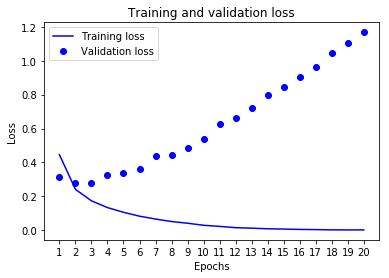

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

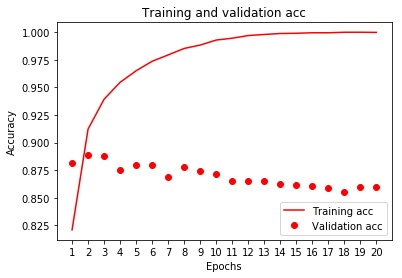

In [92]:
import matplotlib.pyplot as plt

acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

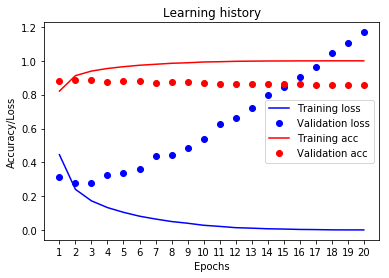

In [93]:
import matplotlib.pyplot as plt

loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs=range(1,len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

### 여기까지 validation 결과 (model.fit) 봤으니, test (model.evaluate)로 이동

In [94]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(20 epochs): ', test_loss)
print('test acc(20 epochs): ', test_acc)

25000/25000 [==============================] - 2s 93us/sample - loss: 1.2885 - acc: 0.8399
test loss(20 epochs):  1.2884658482313156
test acc(20 epochs):  0.83988


## 7. (과대적합 되기 전까지) 모델 학습

In [95]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model=Sequential()
model.add(Dense(16, activation='relu', input_shape=(10**4,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

history=model.fit(X_train1, 
                 y_train1, 
                 epochs=3, 
                 batch_size=256, 
                 validation_data=(X_valid, y_valid))

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 139us/sample - loss: 0.4523 - acc: 0.8179 - val_loss: 0.3289 - val_acc: 0.8808
Epoch 2/3
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2487 - acc: 0.9140 - val_loss: 0.2762 - val_acc: 0.8892
Epoch 3/3
15000/15000 [==============================] - 2s 123us/sample - loss: 0.1752 - acc: 0.9396 - val_loss: 0.3069 - val_acc: 0.8812


## 7-2. 모델 학습: 조기 종료 콜백함수 버전

In [102]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
model2=Sequential()
model2.add(Dense(16, activation='relu', input_shape=(10**4,)))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy'])

#### 여기가 새로 추가되는 부분
callbacks_list = [EarlyStopping(monitor='val_loss', patience=3),
                 ModelCheckpoint(filepath='model.h5', monitor='val_loss', 
                                save_best_only=True)]

history=model2.fit(X_train1, 
                 y_train1, 
                 epochs=20, 
                 batch_size=256, 
                 validation_data=(X_valid, y_valid), 
                 callbacks=callbacks_list)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 158us/step - loss: 0.4592 - acc: 0.8227 - val_loss: 0.3314 - val_acc: 0.8837
Epoch 2/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.2530 - acc: 0.9144 - val_loss: 0.2944 - val_acc: 0.8824
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1827 - acc: 0.9377 - val_loss: 0.2934 - val_acc: 0.8844
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1403 - acc: 0.9550 - val_loss: 0.3018 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1102 - acc: 0.9639 - val_loss: 0.3116 - val_acc: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0851 - acc: 0.9723 - val_loss: 0.3393 - val_acc: 0.8829


In [103]:
test_loss, test_acc = model2.evaluate(X_test,y_test)
print('test loss(3 epochs): ', test_loss)
print('test acc(3 epochs): ', test_acc)

25000/25000 [==============================] - 2s 97us/step
test loss(3 epochs):  0.3726549826860428
test acc(3 epochs):  0.86624


### After validation, do testing

In [96]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(3 epochs): ', test_loss)
print('test acc(3 epochs): ', test_acc)

25000/25000 [==============================] - 2s 86us/sample - loss: 0.3349 - acc: 0.8659
test loss(3 epochs):  0.33487927971839904
test acc(3 epochs):  0.86592


## 8. 학습된 모델로 새로운 데이터 예측

In [97]:
# 여러 개 동시에 예측
result=model.predict(X_test)
print(result)

print()

# 하나씩 예측
sample=X_test[0]
result=model.predict(np.expand_dims(sample, axis=0))
print(result)

[[0.17003477]
 [0.99724555]
 [0.36107522]
 ...
 [0.03786522]
 [0.04440641]
 [0.21088663]]

[[0.17003475]]


# 두 번째 실습: 다중 분류 (Reuter)

## 1. 데이터 준비

In [98]:
from tensorflow.keras.datasets import reuters
import numpy as np

# save np.load
np_load_old=np.load

# modify the default parameters of np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_picke implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10**4)

# restore np.load for future normal usage
np.load=np_load_old

In [99]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire=' '.join([reverse_word_index(i -3, '?') for i in train_data[0]])

TypeError: 'dict' object is not callable

In [ ]:
decoded_newswire